In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import joblib

In [3]:
model = joblib.load('pipeline.pkl')

In [8]:
df = pd.read_csv('MergedData.csv')
df = df.drop(['Unnamed: 0','zip'],axis=1)
label_data = df[~(df['Liking'].isnull())]
unlabel_data  = df[df['Liking'].isnull()]
for i in label_data:
    if label_data[i].nunique()<2:
        label_data = label_data.drop(i,axis=1)
print(label_data.shape)
label_data.head()

(1488, 81)


,submarket_name,number_of_properties,year,period,completions,vac_pct,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment,...,commuters_by_subway_or_elevated,group_quarters,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,armed_forces,employed_agriculture_forestry_fishing_hunting_mining,employed_information,employed_public_administration,Liking
0,Alief/Kirkwood,47.0,1990.0,Y,0.0,0.099,NaN,NaN,NaN,1807870.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
1,Alief/Kirkwood,47.0,1991.0,Y,0.0,0.101,0.040,-0.2,0.0,1809400.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
2,Alief/Kirkwood,47.0,1992.0,Y,0.0,0.088,0.032,1.4,0.0,1823370.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
3,Alief/Kirkwood,47.0,1993.0,Y,0.0,0.072,0.014,1.7,0.0,1865200.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0
4,Alief/Kirkwood,47.0,1994.0,Y,0.0,0.059,0.023,1.4,0.0,1918630.0,...,0.0,168.0,1801.0,867.0,2012.0,0.0,283.0,507.0,462.0,0.0


In [9]:
data = label_data.drop('Liking',axis=1)
target = label_data['Liking']

<AxesSubplot:>

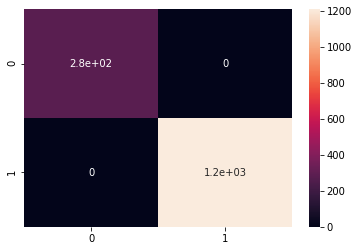

In [12]:
y_pred = model.predict(data)
sns.heatmap(confusion_matrix(target,y_pred),annot=True)